### Chain
Review
We built a simple graph with nodes, normal edges, and conditional edges.

Goals
Now, let's build up to a simple chain that combines 4 concepts:

Using chat messages as our graph state
Using chat models in graph nodes
Binding tools to our chat model
Executing tool calls in graph nodes

In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-2.5-32b")
result=llm.invoke(messages)
result

AIMessage(content='To see orcas (also known as killer whales) in the United States, the Pacific Northwest, particularly the San Juan Islands in Washington state, is one of the best locations.orca sightings are quite common there, especially during the summer months when they come to feed on salmon. The waters around the San Juan Islands are often referred to as the "Orca Capital of the World" due to the high frequency of sightings.\n\nAnother good place to see orcas is in southern Alaska, particularly in the Inside Passage region. There, orcas can be spotted year-round, although they are more common during the salmon runs in the summer.\n\nIf you\'re interested in seeing orcas, it\'s a good idea to go on a guided whale-watching tour. These tours are led by experienced naturalists and are a great way to learn more about orcas and their behaviors. Remember to check the specific tour operator\'s policies and the best time to plan your visit for the highest chance of seeing orcas.', additi

In [4]:
def add(a:int,b:int)-> int:
    """Add a and b.

    Args:
        a: first int
        b: second int
    """
    return a+b

In [5]:
llm_with_tools = llm.bind_tools([add])

In [6]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"what is 2 plus 3",name='Lance')])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rhbv', 'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 192, 'total_tokens': 217, 'completion_time': 0.125, 'prompt_time': 0.011313318, 'queue_time': 0.223604867, 'total_time': 0.136313318}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-977de248-953b-4776-b3bb-cb58e0589007-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'call_rhbv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 192, 'output_tokens': 25, 'total_tokens': 217})

In [7]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'call_rhbv',
  'type': 'tool_call'}]

In [8]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]



In [9]:
initial_message = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                   HumanMessage(content="I'm looking for information on generative ai.", name="Moni")]
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

add_messages(initial_message,new_message)


[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='e630b79a-7638-40ad-a082-ae22e38f646e'),
 HumanMessage(content="I'm looking for information on generative ai.", additional_kwargs={}, response_metadata={}, name='Moni', id='0bbb01ca-bb17-4de8-9d77-22235b959498'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='5d7f5de0-4a9d-40df-a44d-6279bbdce558')]

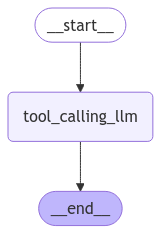

In [10]:
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

def tool_calling_llm(state:MessageState):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}


builder = StateGraph(MessageState)
builder.add_node('tool_calling_llm',tool_calling_llm)
builder.add_edge(START,'tool_calling_llm')
builder.add_edge('tool_calling_llm',END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
messages = graph.invoke({'messages':HumanMessage(content="What is 2 minus 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 minus 3
================================== Ai Message ==================================
Tool Calls:
  add (call_v8bg)
 Call ID: call_v8bg
  Args:
    a: 2
    b: -3


In [12]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [13]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-2.5-32b")
llm
result=llm.invoke("Hello")
result
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

In [14]:
result=llm.invoke("Hello")
result

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003689185, 'queue_time': 0.228010319, 'total_time': 0.053689185}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-7fb76fa6-cb63-4e87-9d8b-b271197e728f-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

### Tools
Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language.

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user.

And, it will return an output that adheres to the tool's schema.

Many LLM providers support tool calling and tool calling interface in LangChain is simple.

You can simply pass any Python function into ChatModel.bind_tools(function).

In [15]:
llm_with_tools = llm.bind_tools([multiply,add])

In [16]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


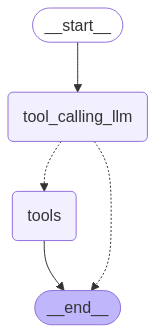

In [17]:
def tool_calling_llm(state:MessagesState):
    return {"messages": [llm_with_tools.invoke(state['messages'])]}

builder = StateGraph(MessagesState)
builder.add_node('tool_calling_llm',tool_calling_llm)
builder.add_node('tools',ToolNode([multiply,add]))

builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges(
    "tool_calling_llm",tools_condition
)

builder.add_edge('tools',END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2 and add 5.")]
messages = graph.invoke({'messages':messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4. Multiply the output by 2 and add 5.
================================== Ai Message ==================================
Tool Calls:
  add (call_36th)
 Call ID: call_36th
  Args:
    a: 3
    b: 4
  multiply (call_32at)
 Call ID: call_32at
  Args:
    a: 7
    b: 2
  add (call_54hb)
 Call ID: call_54hb
  Args:
    a: 14
    b: 5
================================= Tool Message =================================
Name: add

7
================================= Tool Message =================================
Name: multiply

14
================================= Tool Message =================================
Name: add

19
